In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go 
import plotly.express as px

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\akhil\GENAI\diminos_data.csv")
df

order_id      order_placed_at          order_delivered_at
0       1523111  2023-03-01 00:00:59  2023-03-01 00:18:07.443132
1       1523112  2023-03-01 00:03:59  2023-03-01 00:19:34.925241
2       1523113  2023-03-01 00:07:22  2023-03-01 00:22:28.291385
3       1523114  2023-03-01 00:07:47  2023-03-01 00:46:19.019399
4       1523115  2023-03-01 00:09:03  2023-03-01 00:25:13.619056
...         ...                  ...                         ...
14995   1538106  2023-03-27 23:37:05  2023-03-27 23:52:37.409378
14996   1538107  2023-03-27 23:47:38  2023-03-28 00:04:22.672912
14997   1538108  2023-03-27 23:50:16  2023-03-28 00:05:40.676238
14998   1538109  2023-03-27 23:52:44  2023-03-28 00:08:41.810358
14999   1538110  2023-03-27 23:58:20  2023-03-28 00:13:42.499311

[15000 rows x 3 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [4]:
df.describe()

order_id
count  1.500000e+04
mean   1.530610e+06
std    4.330271e+03
min    1.523111e+06
25%    1.526861e+06
50%    1.530610e+06
75%    1.534360e+06
max    1.538110e+06

In [5]:
from datetime import datetime

In [6]:
df['order_placed_time'] = pd.to_datetime(df['order_placed_at'], errors='coerce')

In [7]:
df['order_delivered_time'] = pd.to_datetime(df['order_delivered_at'], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_id              15000 non-null  int64         
 1   order_placed_at       15000 non-null  object        
 2   order_delivered_at    15000 non-null  object        
 3   order_placed_time     15000 non-null  datetime64[ns]
 4   order_delivered_time  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 586.1+ KB


In [9]:
df['time_diff_in_min']=(df['order_delivered_time']-df['order_placed_time']).dt.total_seconds()/60

In [10]:
df

order_id      order_placed_at          order_delivered_at  \
0       1523111  2023-03-01 00:00:59  2023-03-01 00:18:07.443132   
1       1523112  2023-03-01 00:03:59  2023-03-01 00:19:34.925241   
2       1523113  2023-03-01 00:07:22  2023-03-01 00:22:28.291385   
3       1523114  2023-03-01 00:07:47  2023-03-01 00:46:19.019399   
4       1523115  2023-03-01 00:09:03  2023-03-01 00:25:13.619056   
...         ...                  ...                         ...   
14995   1538106  2023-03-27 23:37:05  2023-03-27 23:52:37.409378   
14996   1538107  2023-03-27 23:47:38  2023-03-28 00:04:22.672912   
14997   1538108  2023-03-27 23:50:16  2023-03-28 00:05:40.676238   
14998   1538109  2023-03-27 23:52:44  2023-03-28 00:08:41.810358   
14999   1538110  2023-03-27 23:58:20  2023-03-28 00:13:42.499311   

        order_placed_time       order_delivered_time  time_diff_in_min  
0     2023-03-01 00:00:59 2023-03-01 00:18:07.443132         17.140719  
1     2023-03-01 00:03:59 2023-03-01 00:19:34.925241         15.598754  
2     2023-03-01 00:07:22 2023-03-01 00:22:28.291385         15.104856  
3     2023-03-01 00:07:47 2023-03-01 00:46:19.019399         38.533657  
4     2023-03-01 00:09:03 2023-03-01 00:25:13.619056         16.176984  
...                   ...                        ...               ...  
14995 2023-03-27 23:37:05 2023-03-27 23:52:37.409378         15.540156  
14996 2023-03-27 23:47:38 2023-03-28 00:04:22.672912         16.744549  
14997 2023-03-27 23:50:16 2023-03-28 00:05:40.676238         15.411271  
14998 2023-03-27 23:52:44 2023-03-28 00:08:41.810358         15.963506  
14999 2023-03-27 23:58:20 2023-03-28 00:13:42.499311         15.374989  

[15000 rows x 6 columns]

In [11]:
df=df.drop(columns={'order_placed_at','order_delivered_at'})

In [12]:
df.describe()

order_id              order_placed_time  \
count  1.500000e+04                          15000   
mean   1.530610e+06  2023-03-14 10:49:21.257533184   
min    1.523111e+06            2023-03-01 00:00:59   
25%    1.526861e+06            2023-03-07 15:57:25   
50%    1.530610e+06     2023-03-14 09:32:06.500000   
75%    1.534360e+06     2023-03-21 07:07:15.500000   
max    1.538110e+06            2023-03-27 23:58:20   
std    4.330271e+03                            NaN   

                order_delivered_time  time_diff_in_min  
count                          15000      15000.000000  
mean   2023-03-14 11:09:51.220893184         20.499389  
min       2023-03-01 00:18:07.443132         15.000010  
25%    2023-03-07 16:20:38.480371200         15.274826  
50%    2023-03-14 09:55:10.638778880         15.797986  
75%    2023-03-21 07:25:22.135336704         17.279661  
max       2023-03-29 02:42:50.645252       7299.831375  
std                              NaN         96.160362

In [13]:
df.isnull().sum()

order_id                0
order_placed_time       0
order_delivered_time    0
time_diff_in_min        0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df['time_diff_in_min'].max()
df['time_diff_in_min'].min()

7299.831374933333

15.000010333333334

In [16]:
data=df['time_diff_in_min'] 
n_means=15000
sample_size=1000  # choose smaller than 15000 for sampling without replacement
rng=np.random.default_rng(seed=42)  # random_state for reproducibility
means=np.array([rng.choice(data,size=sample_size,replace=False).mean() for i in range(n_means)])

print(means[:10])
print("Overall mean of resampled means:", means.mean())

[19.63794641 19.05079467 26.80680172 26.81071457 18.40921498 18.36245988
 18.33702561 24.57705851 22.13076471 22.45296703]
Overall mean of resampled means: 20.46748770733181


In [17]:
df['mean_time']=means

In [18]:
df

order_id   order_placed_time       order_delivered_time  \
0       1523111 2023-03-01 00:00:59 2023-03-01 00:18:07.443132   
1       1523112 2023-03-01 00:03:59 2023-03-01 00:19:34.925241   
2       1523113 2023-03-01 00:07:22 2023-03-01 00:22:28.291385   
3       1523114 2023-03-01 00:07:47 2023-03-01 00:46:19.019399   
4       1523115 2023-03-01 00:09:03 2023-03-01 00:25:13.619056   
...         ...                 ...                        ...   
14995   1538106 2023-03-27 23:37:05 2023-03-27 23:52:37.409378   
14996   1538107 2023-03-27 23:47:38 2023-03-28 00:04:22.672912   
14997   1538108 2023-03-27 23:50:16 2023-03-28 00:05:40.676238   
14998   1538109 2023-03-27 23:52:44 2023-03-28 00:08:41.810358   
14999   1538110 2023-03-27 23:58:20 2023-03-28 00:13:42.499311   

       time_diff_in_min  mean_time  
0             17.140719  19.637946  
1             15.598754  19.050795  
2             15.104856  26.806802  
3             38.533657  26.810715  
4             16.176984  18.409215  
...                 ...        ...  
14995         15.540156  26.655481  
14996         16.744549  19.199279  
14997         15.411271  18.384811  
14998         15.963506  22.613134  
14999         15.374989  19.109318  

[15000 rows x 5 columns]

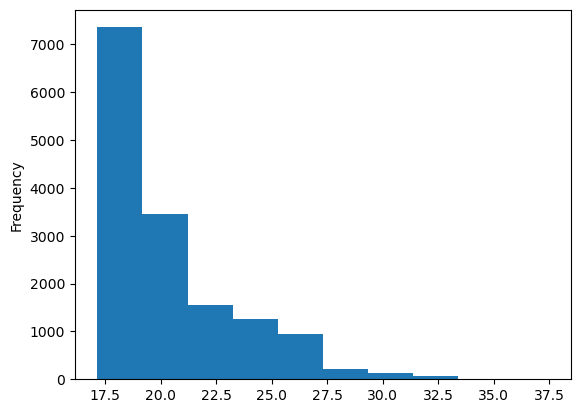

In [19]:
df['mean_time'].plot(kind='hist');

In [20]:
df['mean_time'].min()
df['mean_time'].max()
df['mean_time'].quantile(1)

17.136179969616663

37.455287692283335

37.455287692283335

In [21]:
df['mean_time'].quantile(0.95)

26.328636061306664

In [22]:
if df['mean_time'].quantile(0.95)<31:
    print("Kanavs Diminos store delivers Pizza less than 95th Percentile on Order Delivery time which is less than 31 mins.")
else:
    print("Kanavs Diminos store doesn't delivers Pizza less than 95th Percentile on Order Delivery time which is less than 31 mins.")

Kanavs Diminos store delivers Pizza less than 95th Percentile on Order Delivery time which is less than 31 mins.


In [23]:
ninety_five_percentile_data=df[df['mean_time']<=26.32863606130666426]
ninety_five_percentile_data

order_id   order_placed_time       order_delivered_time  \
0       1523111 2023-03-01 00:00:59 2023-03-01 00:18:07.443132   
1       1523112 2023-03-01 00:03:59 2023-03-01 00:19:34.925241   
4       1523115 2023-03-01 00:09:03 2023-03-01 00:25:13.619056   
5       1523116 2023-03-01 00:09:44 2023-03-01 00:25:17.088349   
6       1523117 2023-03-01 00:11:09 2023-03-01 00:41:54.245295   
...         ...                 ...                        ...   
14994   1538105 2023-03-27 23:32:06 2023-03-27 23:47:25.224968   
14996   1538107 2023-03-27 23:47:38 2023-03-28 00:04:22.672912   
14997   1538108 2023-03-27 23:50:16 2023-03-28 00:05:40.676238   
14998   1538109 2023-03-27 23:52:44 2023-03-28 00:08:41.810358   
14999   1538110 2023-03-27 23:58:20 2023-03-28 00:13:42.499311   

       time_diff_in_min  mean_time  
0             17.140719  19.637946  
1             15.598754  19.050795  
4             16.176984  18.409215  
5             15.551472  18.362460  
6             30.754088  18.337026  
...                 ...        ...  
14994         15.320416  19.348978  
14996         16.744549  19.199279  
14997         15.411271  18.384811  
14998         15.963506  22.613134  
14999         15.374989  19.109318  

[14250 rows x 5 columns]

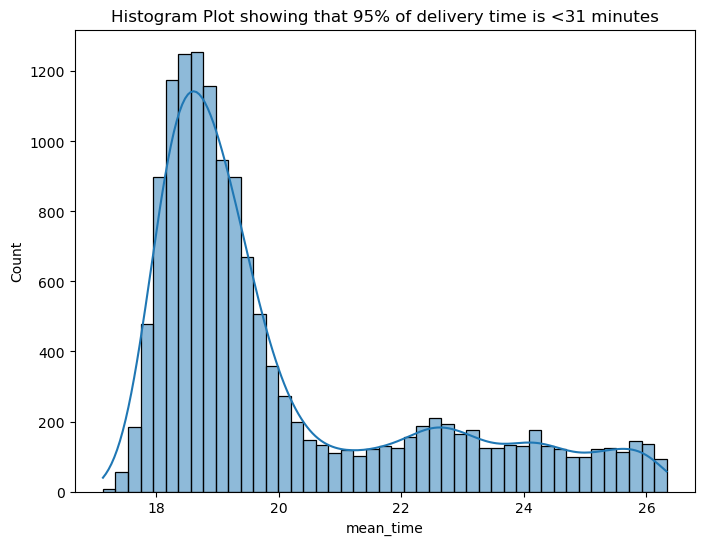

In [24]:
plt.figure(figsize=(8,6))
sns.histplot(ninety_five_percentile_data['mean_time'],kde=True)
plt.title("Histogram Plot showing that 95% of delivery time is <31 minutes");